<a href="https://colab.research.google.com/github/VijiniEP/DL-Fashion-Classification/blob/IT20657864_A.D.S.Dodanthenna/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN using the Fashion MNIST Dataset**

In [1]:
# Store or process in the dataframe
import pandas as pd
# Advanced ploting
import seaborn as sns
# To get the ploting graphs
import matplotlib.pyplot as plt
import tensorflow as tf
# Calculate numerical analysis
import numpy as np
from numpy import argmax, array_equal
# Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten, MaxPooling2D
# Train the test split
from sklearn.model_selection import train_test_split
# Stoping the training if there is not any improvement within the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Metrics for model performance
from sklearn.metrics import classification_report
# Utility functions
from tensorflow.keras.utils import to_categorical
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

#### **Step 1: Load the Dataset**
##### This step is loading the Fashion MNIST dataset from Kaggle. First, it removes any existing Kaggle configuration files and directories from the system. Then, it installs the Kaggle library using pip. Next, it uploads the Kaggle API credentials file (kaggle.json) which allows access to the Kaggle dataset. The credentials file is saved in the .kaggle directory in the user's home folder and its permission is changed. The Fashion MNIST dataset is downloaded from Kaggle using the kaggle datasets download command. Finally, the code unzips the downloaded files and loads the train and test datasets using pandas read_csv function

In [2]:
# If there is any file .kaggle directory remove it or Delete
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


Install the Keggle python library

In [3]:
# Install Kaggle
!pip install -q kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [4]:
# Upload kaggle.json file to the google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dinushikadodanthenna","key":"c1ceb5fa79325b05cd71c20ec31be028"}'}

In [5]:
# Save the file in the correct directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission of the working directory
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download "Fashion MNIST" dataset from the Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 81% 56.0M/68.8M [00:00<00:00, 172MB/s]
100% 68.8M/68.8M [00:00<00:00, 182MB/s]


In [7]:
# Extract files from the fashion.zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [8]:
# Load Data to the working directory
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

Data Visulization After Step 1

In [9]:
# Train the Head of dataset
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Test the Head of the dataset
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Print the total number of columns and rows within the trained and tested datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [12]:
# Create a dictionaries for all labels
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

#  Distribution Method and the Implementation to get classes.
def get_classes_distribution(data):
    # Get the total count for the each label
    label_counts = data["label"].value_counts()

    # Get the total number of samples
    total_samples = len(data)


    # Count the total number of items related to each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Get the distribution,for the classes by using training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


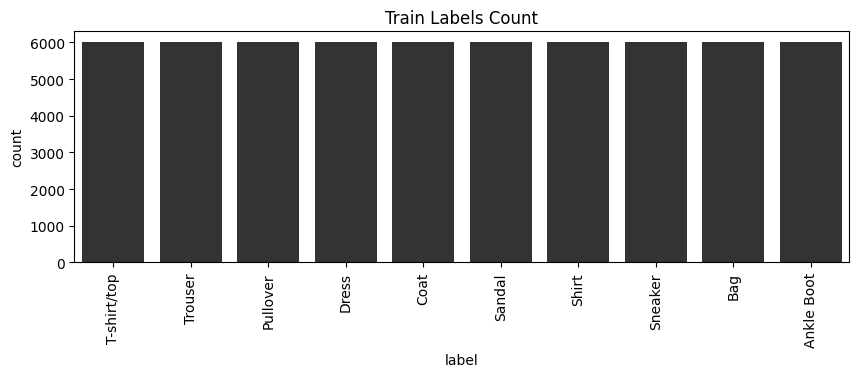

In [13]:
# Plot Label for the Class Implementation method for the Training Dataset
def plot_label_per_class(train):
    # Convert trained dataset to the pandas dataframe
    train_df = pd.DataFrame(train)

    # Creating plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize the class distribution by using training dataset
plot_label_per_class(train)

In [14]:
# Calculate distribution of the lables using  testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


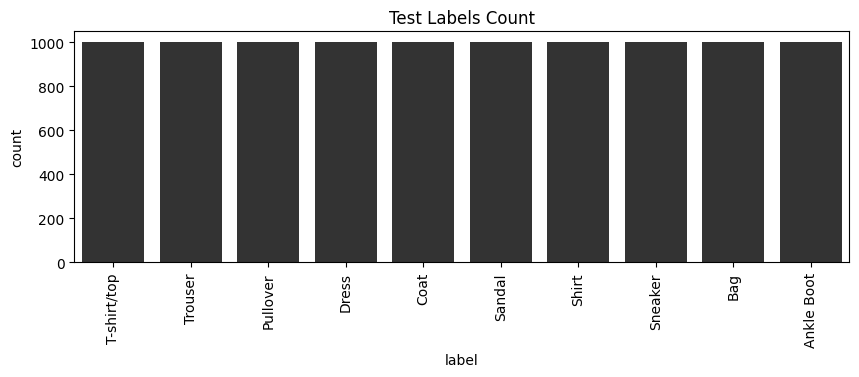

In [15]:
# Plot Label for the each Class Implementation method for the Testing Dataset
def plot_label_per_class(test):
    # Converting test to pandas dataframe
    test_df = pd.DataFrame(test)

    # Creating the plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize class distribution by using testing dataset
plot_label_per_class(test)

Step 2: Preprocess the Data
This data preprocessing step aims to prepare the Fashion MNIST dataset for training a neural network. The first step involves extracting the image data and their corresponding labels from the train and test datasets using pandas. After this, the images are reshaped into a 28x28 pixel format as they were originally flattened into a 1D array of 784 pixels.
Next, the pixel values are normalized to the range 0 to 1 by dividing each pixel value by 255. This rescales the pixel values to a range suitable for training a neural network. The rescaled pixel values help in making the model more robust and prevents overfitting.

Finally, the data is split into training and testing sets using an 80-20 split. The training set will be used to train the model while the test set will be used to evaluate the performance of the trained model.

In [16]:
# Rescale to image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [17]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [18]:
# Fix data type of images and Normalize images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Data Visulization After Step 2 (Before Data Spliting)

In [19]:
# View Trained Data Images
train_images

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [20]:
# View Trained Data Labels
train_labels

array([2, 9, 6, ..., 8, 8, 7])

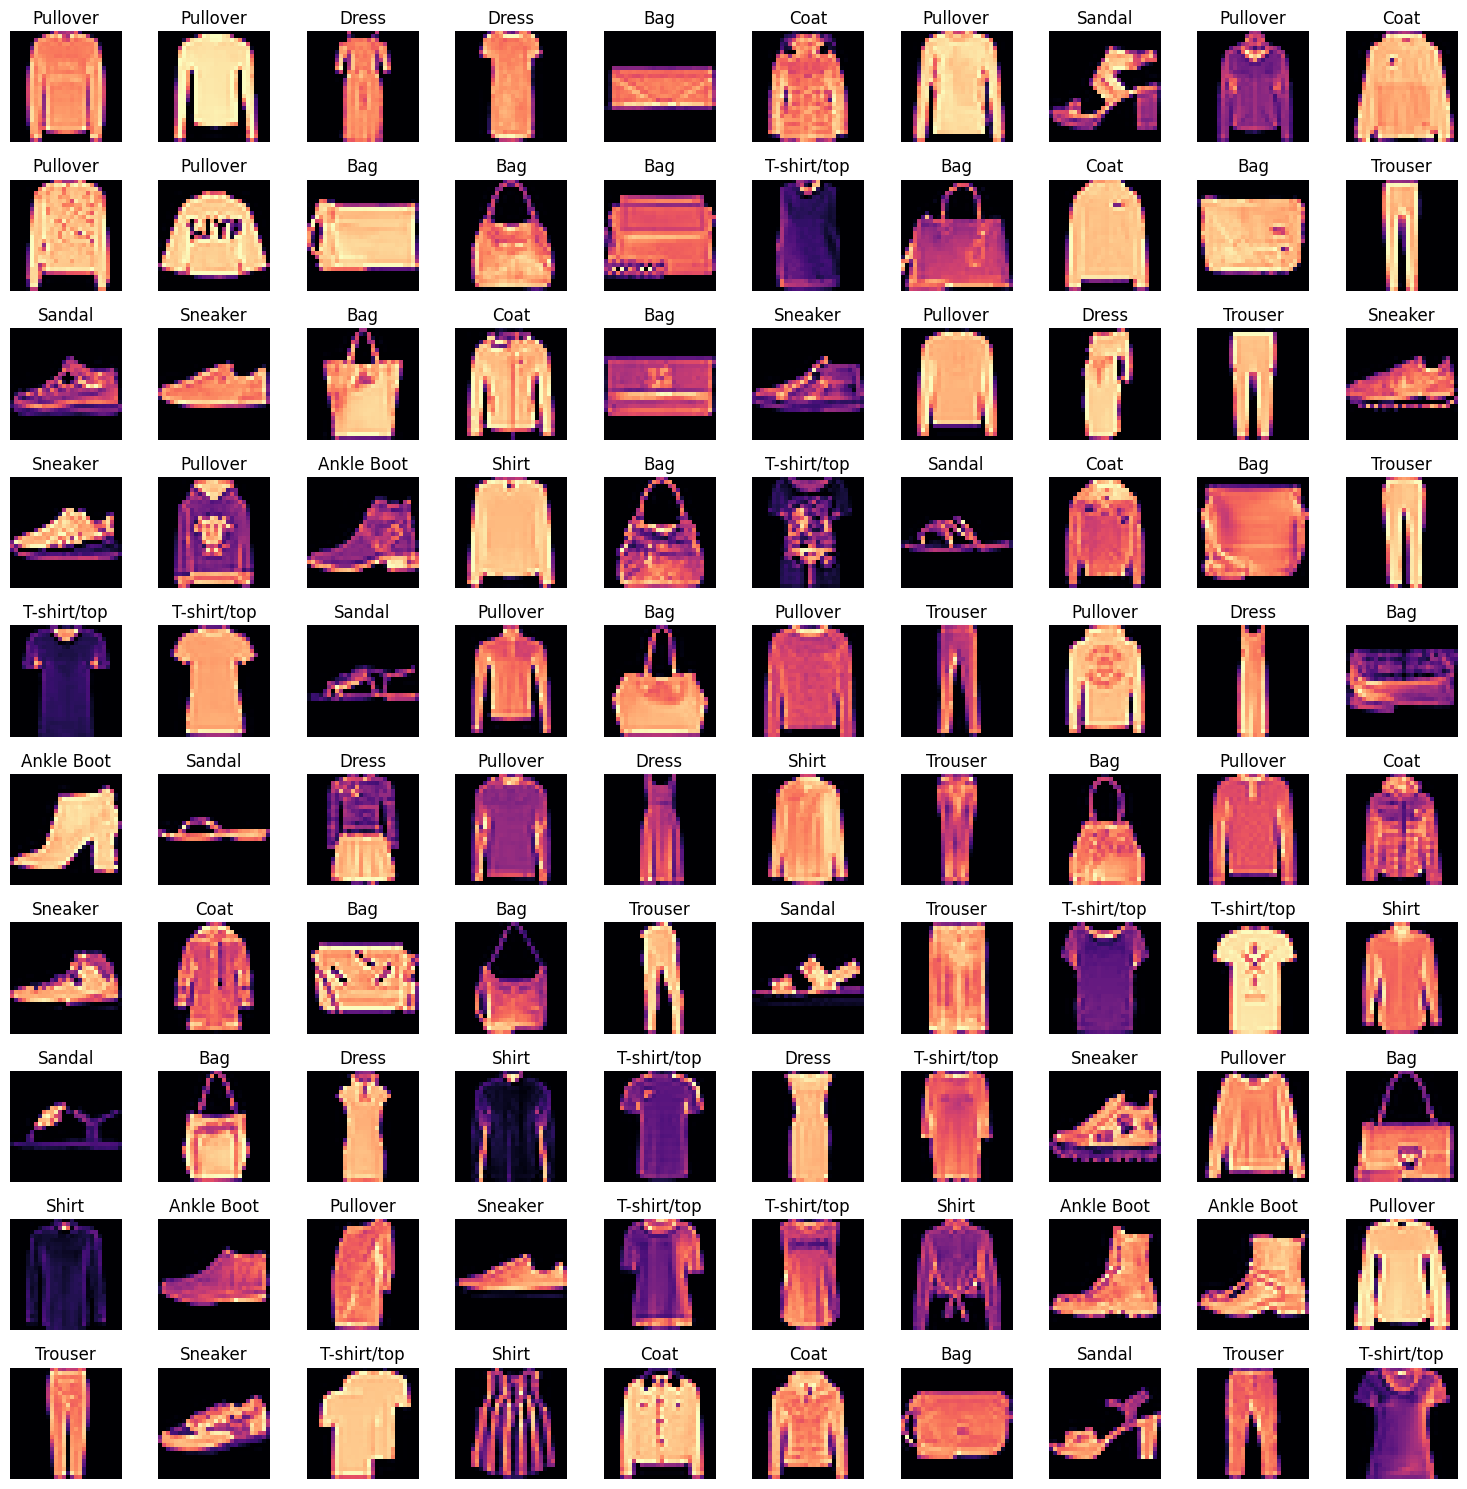

In [21]:
# Data Visualization
# Class Names given from the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# First few trained images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

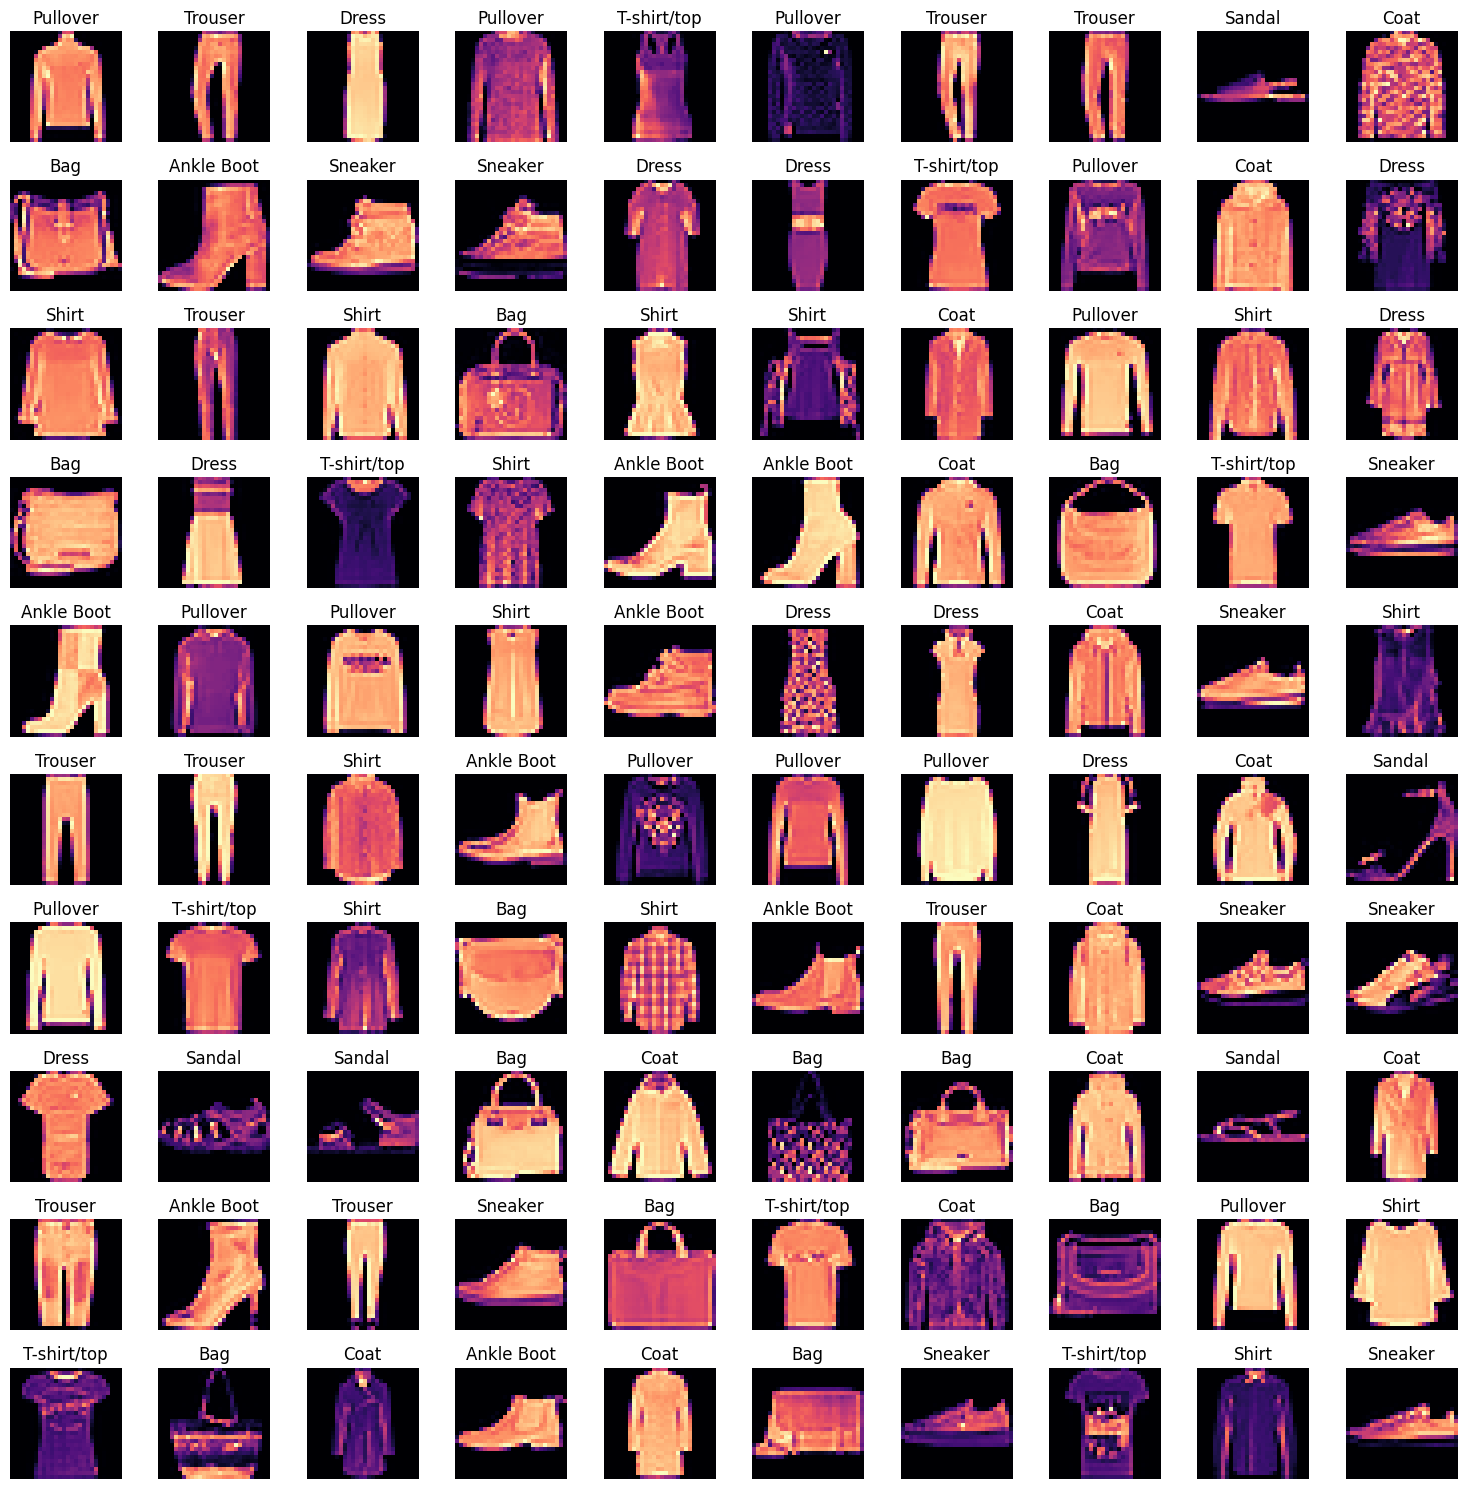

In [22]:
# First few tested images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
# Split data into two categories, named training and testing
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Step 3: Build the CNN Model
This step involves building a convolutional neural network (CNN) architecture to classify the Fashion MNIST dataset. The model is built using Keras Sequential API. The input shape of the model is (28, 28, 1) which is the shape of the Fashion MNIST images. The model architecture consists of three convolutional layers followed by two dense layers. The first convolutional layer has 32 filters of size 3x3 with the activation function set to 'relu'. It takes the input shape of (28, 28, 1). Then there is a max-pooling layer with a pool size of 2x2 which reduces the dimensionality of the feature maps. The second and third convolutional layers follow the same pattern with 64 filters and a 3x3 kernel size. After that, the feature maps are flattened into a 1D array using the Flatten layer. The flattened data is then passed through two dense layers with 64 and 10 neurons respectively. The activation function of the dense layers is set to 'relu' except for the final layer where it is set to 'softmax', which is used for multi-class classification. Finally, a dropout layer with a dropout rate of 0.5 is added to prevent overfitting.

In [24]:
# Model Parameters
INPUT_SHAPE = (28, 28, 1)
BATCH_SIZE = 128
EPOCHS = 25
VERBOSE = 2

In [25]:
# Buildup the model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Flatten(),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')
])

Step 4: Train and Evaluate the Model
In this step, first the model parameters such as batch size, epochs and verbosity are defined. The model is then compiled with the optimizer, loss function, and evaluation metric. The model summary is printed to give a summary of the model architecture.
The EarlyStopping callback is used to stop the model training when the monitored validation loss does not improve after a certain number of epochs (patience).
Then the model is trained on the training dataset using the fit() function with the specified batch size, number of epochs, and verbosity. The EarlyStopping callback is also passed as an argument to the fit function.
Finally, the model is evaluated on the testing dataset using the evaluate() function, which returns the loss and accuracy of the model on the testing dataset. The test loss and accuracy are printed to give an indication of how well the model performs on unseen data.

In [26]:
# Model training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# View the Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [28]:
# Stop training and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [29]:
# Model Fitting
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/25
375/375 - 39s - loss: 0.8681 - accuracy: 0.6871 - val_loss: 0.5260 - val_accuracy: 0.7969 - 39s/epoch - 103ms/step
Epoch 2/25
375/375 - 37s - loss: 0.5501 - accuracy: 0.7999 - val_loss: 0.4138 - val_accuracy: 0.8380 - 37s/epoch - 99ms/step
Epoch 3/25
375/375 - 36s - loss: 0.4754 - accuracy: 0.8301 - val_loss: 0.3629 - val_accuracy: 0.8668 - 36s/epoch - 95ms/step
Epoch 4/25
375/375 - 38s - loss: 0.4257 - accuracy: 0.8483 - val_loss: 0.3328 - val_accuracy: 0.8772 - 38s/epoch - 100ms/step
Epoch 5/25
375/375 - 35s - loss: 0.3948 - accuracy: 0.8617 - val_loss: 0.3194 - val_accuracy: 0.8791 - 35s/epoch - 94ms/step
Epoch 6/25
375/375 - 37s - loss: 0.3660 - accuracy: 0.8727 - val_loss: 0.3043 - val_accuracy: 0.8869 - 37s/epoch - 98ms/step
Epoch 7/25
375/375 - 37s - loss: 0.3466 - accuracy: 0.8784 - val_loss: 0.2977 - val_accuracy: 0.8914 - 37s/epoch - 100ms/step
Epoch 8/25
375/375 - 36s - loss: 0.3248 - accuracy: 0.8854 - val_loss: 0.2904 - val_accuracy: 0.8925 - 36s/epoch - 96ms/st

In [30]:
# By considering testing dataset evaluate the model.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss: {:.2f}%'.format(test_loss*100))
print('Test Accuracy: {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 4s 11ms/step - loss: 0.2450 - accuracy: 0.9177
Test Loss: 24.50%
Test Accuracy: 91.77%


Data Visulization After Step 3 and 4

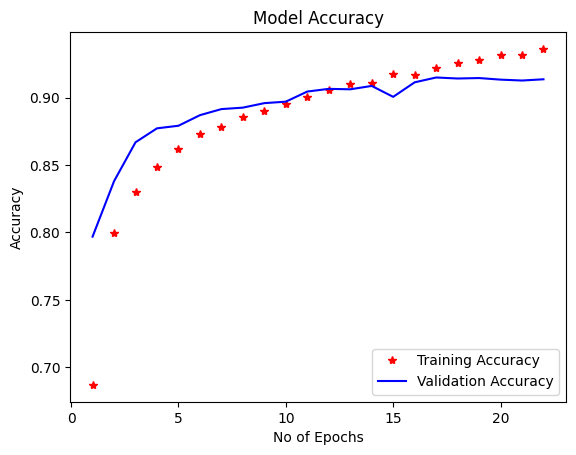

In [31]:
# Data Visualization
# Plot graphs to get the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('./cnn_accuracy_plot.png')
plt.show()

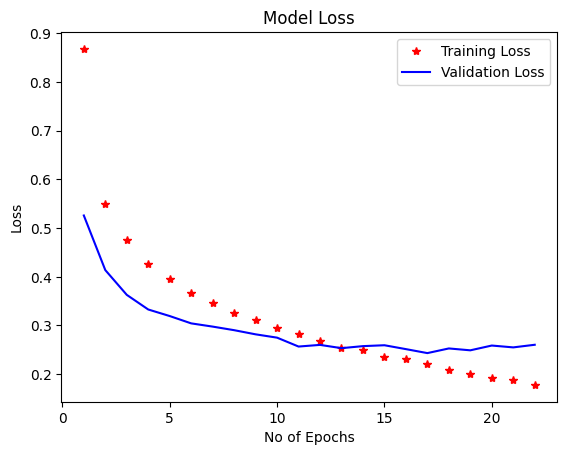

In [32]:
# Data Visualization
# Plot graphs for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('./cnn_loss_plot.png')
plt.show()

In [33]:
# Predicted values
y_pred = model.predict(X_test)

# Decoding the predicted labels
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

375/375 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.86      0.87      1232
     Trouser       1.00      0.97      0.98      1174
    Pullover       0.84      0.90      0.87      1200
       Dress       0.89      0.94      0.91      1242
        Coat       0.85      0.87      0.86      1185
      Sandal       0.99      0.97      0.98      1141
       Shirt       0.79      0.72      0.75      1243
     Sneaker       0.96      0.97      0.97      1224
         Bag       0.98      0.98      0.98      1149
  Ankle boot       0.98      0.97      0.97      1210

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



<ipython-input-34-555988a908f1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


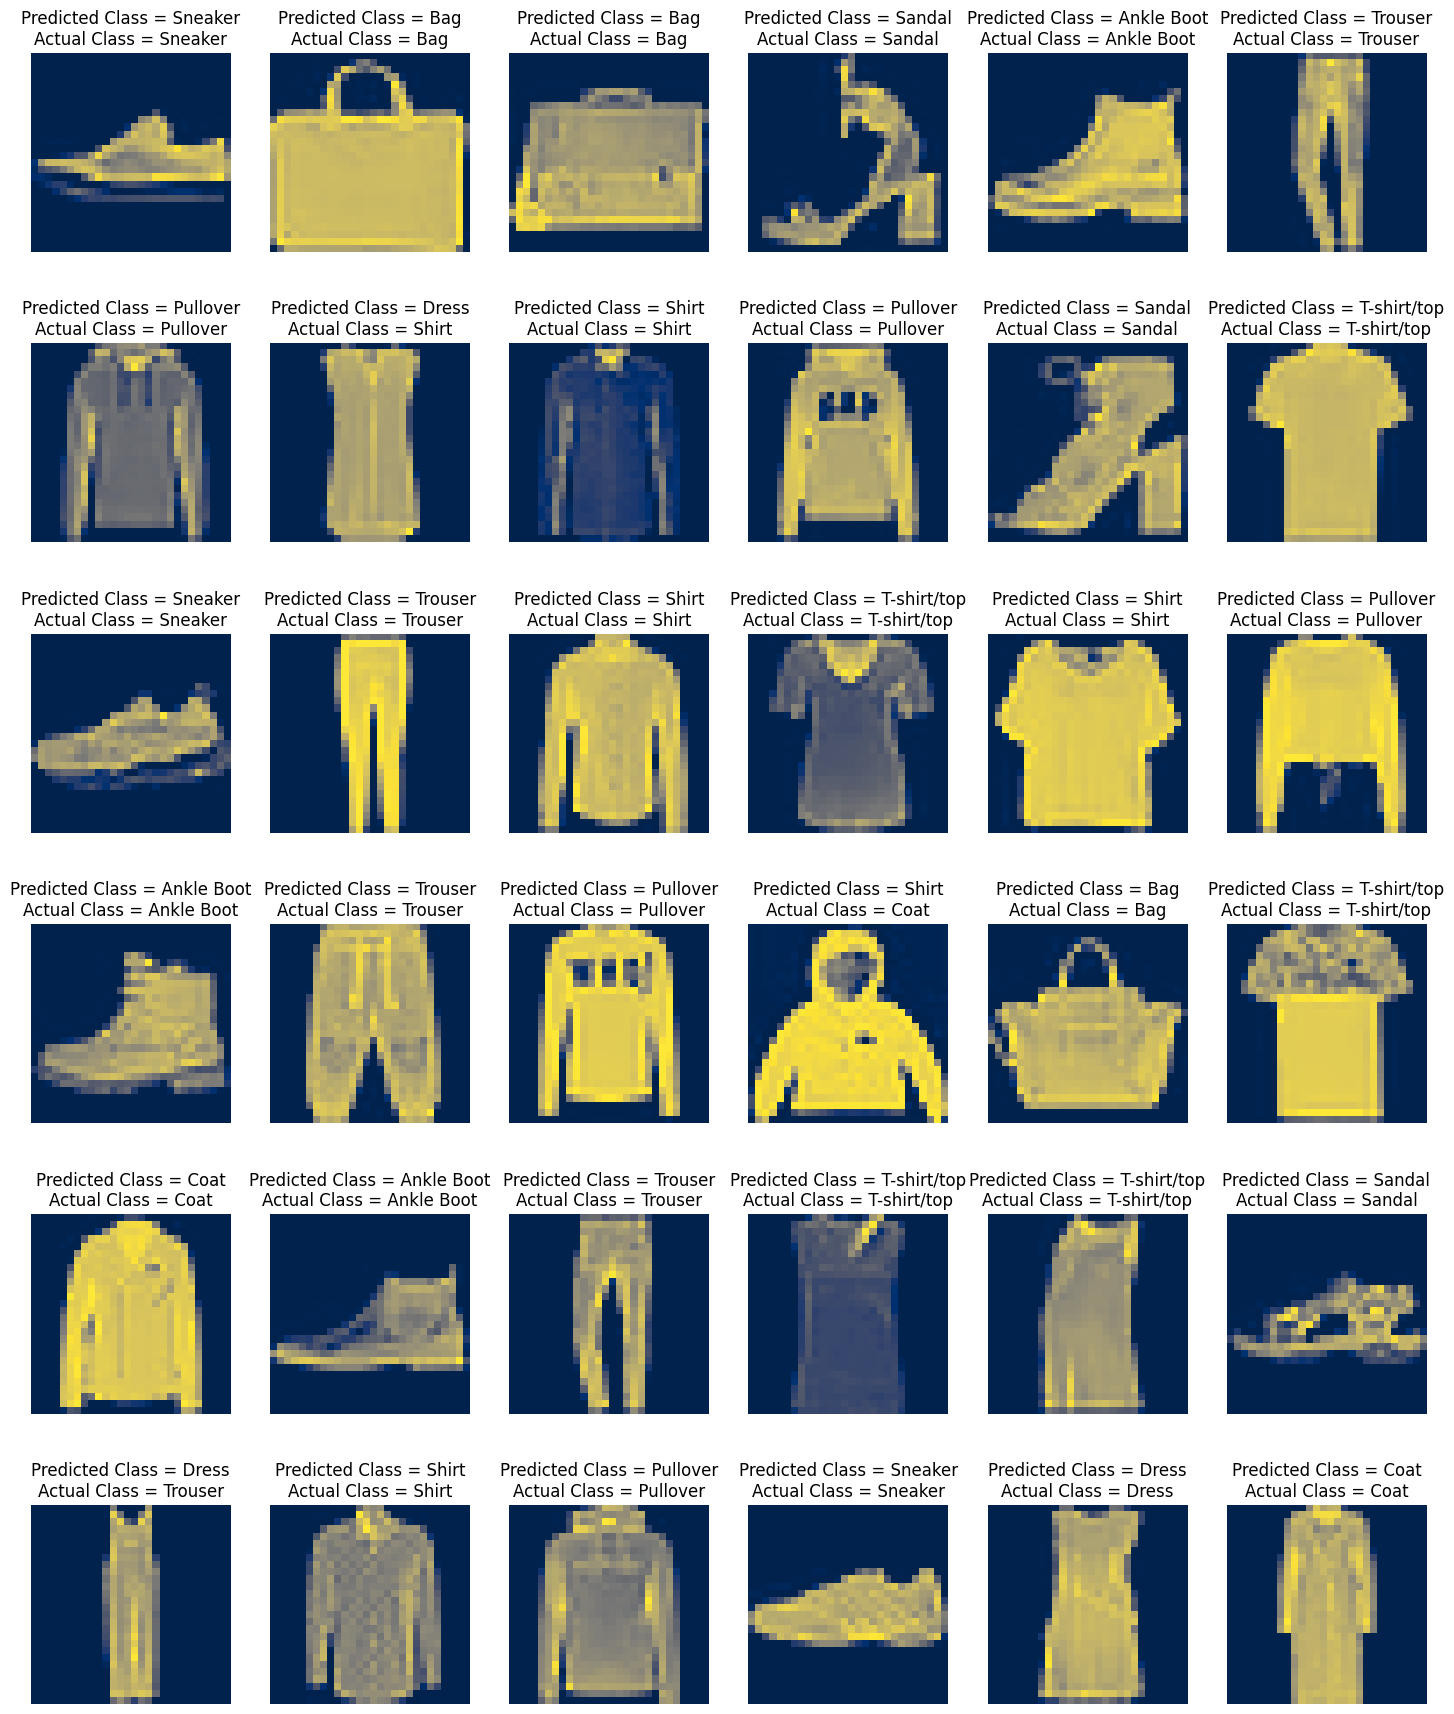

In [34]:
# Each image's predicted target
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(X_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[y_pred[ind]] + '\n' + 'Actual Class = ' + labels[y_test[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./cnn_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')